#**Task - 1**

In [ ]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [ ]:
raw_df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.00632,18.00,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3
1,396.90000,4.98,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02731,0.00,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8
3,396.90000,9.14,21.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.02729,0.00,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8


In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("https://mjnvsai.github.io/Machine_Learning/heart.csv")

# The shape of the data
print("The shape of the dataset is : ", df.shape)

# Preview of the first 5 rows of the data
df.head()

The shape of the dataset is :  (303, 14)


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
# Checking the number of unique values in each column

dict = {}
for i in list(df.columns):
    dict[i] = df[i].value_counts().shape[0]

pd.DataFrame(dict,index=["unique count"]).transpose()

,unique count
age,41
sex,2
cp,4
trtbps,49
chol,152
fbs,2
restecg,3
thalachh,91
exng,2
oldpeak,40


In [ ]:
# Separating the columns in categorical and continuous

cat_cols = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
con_cols = ["age","trtbps","chol","thalachh","oldpeak"]
target_col = ["output"]
print("The categorial cols are : ", cat_cols)
print("The continuous cols are : ", con_cols)
print("The target variable is :  ", target_col)

The categorial cols are :  ['sex', 'exng', 'caa', 'cp', 'fbs', 'restecg', 'slp', 'thall']
The continuous cols are :  ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
The target variable is :   ['output']


In [ ]:
# Summary statistics

df[con_cols].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [ ]:
# Missing values

df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [ ]:
# Scaling
from sklearn.preprocessing import RobustScaler

# Train Test Split
from sklearn.model_selection import train_test_split

# Models
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Metrics
from sklearn.metrics import accuracy_score, classification_report, roc_curve

In [ ]:
# Scaling and Encoding features

# creating a copy of df
df1 = df

# define the columns to be encoded and scaled
cat_cols = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
con_cols = ["age","trtbps","chol","thalachh","oldpeak"]

# encoding the categorical columns
df1 = pd.get_dummies(df1, columns = cat_cols, drop_first = True)

# defining the features and target
X = df1.drop(['output'],axis=1)
y = df1[['output']]

# instantiating the scaler
scaler = RobustScaler()

# scaling the continuous featuree
X[con_cols] = scaler.fit_transform(X[con_cols])
print("The first 5 rows of X are")
X.head()

The first 5 rows of X are


,age,trtbps,chol,thalachh,oldpeak,sex_1,exng_1,caa_1,caa_2,caa_3,...,cp_2,cp_3,fbs_1,restecg_1,restecg_2,slp_1,slp_2,thall_1,thall_2,thall_3
0,0.592593,0.75,-0.110236,-0.092308,0.9375,1,0,0,0,0,...,0,1,1,0,0,0,0,1,0,0
1,-1.333333,0.00,0.157480,1.046154,1.6875,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
2,-1.037037,0.00,-0.566929,0.584615,0.3750,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,0.074074,-0.50,-0.062992,0.769231,0.0000,1,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
4,0.148148,-0.50,1.795276,0.307692,-0.1250,0,1,0,0,0,...,0,0,0,1,0,0,1,0,1,0


In [ ]:
# Dimensionality Reduction

from sklearn.decomposition import PCA

pca = PCA(n_components=22)
X = pca.fit_transform(X)

In [ ]:
# Train and test split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
print("The shape of X_train is: ", X_train.shape)
print("The shape of X_test is: ",X_test.shape)
print("The shape of y_train is: ",y_train.shape)
print("The shape of y_test is: ",y_test.shape)

The shape of X_train is:  (242, 22)
The shape of X_test is:  (61, 22)
The shape of y_train is:  (242, 1)
The shape of y_test is:  (61, 1)


In [ ]:
# instantiating the object and fitting
clf = SVC(kernel='linear', C=1, random_state=42).fit(X_train,y_train)

# predicting the values
y_pred = clf.predict(X_test)

# printing the test accuracy
print("The test accuracy score of SVM is ", accuracy_score(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred, digits=4))

The test accuracy score of SVM is  0.8688524590163934
Classification Report: 
               precision    recall  f1-score   support

           0     0.8387    0.8966    0.8667        29
           1     0.9000    0.8438    0.8710        32

    accuracy                         0.8689        61
   macro avg     0.8694    0.8702    0.8688        61
weighted avg     0.8709    0.8689    0.8689        61



Iter 0: cost: 0.9630790900890911
Iter 10000: cost: 0.35207908092552
Iter 20000: cost: 0.32434715031270844
Iter 30000: cost: 0.3118760781960616
Iter 40000: cost: 0.3047201733044162
Iter 50000: cost: 0.3002186873198842
Iter 60000: cost: 0.29722314401132116
Iter 70000: cost: 0.2951435180224018
Iter 80000: cost: 0.2936488361564284
Iter 90000: cost: 0.29254233444797684


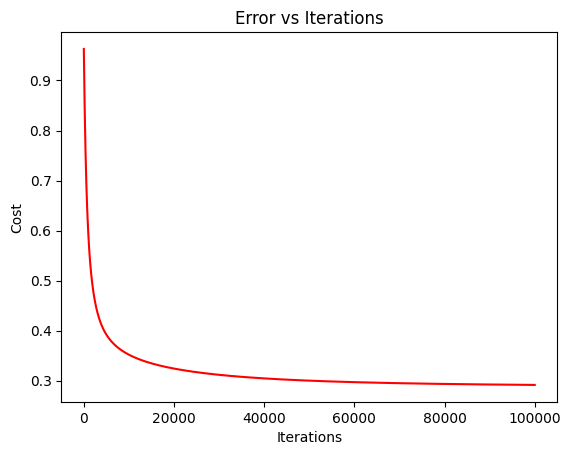

The test accuracy score of Logistric Regression is  0.9016393442622951
Classification Report: 
               precision    recall  f1-score   support

           0     0.8966    0.8966    0.8966        29
           1     0.9062    0.9062    0.9062        32

    accuracy                         0.9016        61
   macro avg     0.9014    0.9014    0.9014        61
weighted avg     0.9016    0.9016    0.9016        61



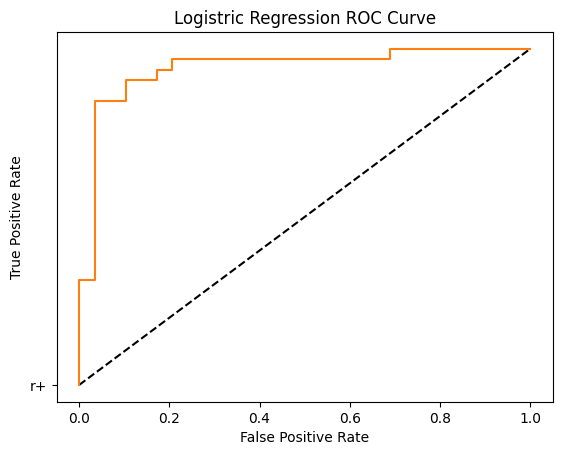

In [ ]:
# define logistic regression impl method

class LogisticRegression:

    def __init__(self, alpha=0.01, iters=1000, verbose = False):
        self.alpha = alpha
        self.iters = iters
        self.theta = None
        self.verbose = verbose
        
    # Logistic Function
    def sigmoid(self, z):
        return  1 / (1 + np.exp(-z))
    
    # Cost Function
    def cost(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

    #Gradient Computation
    def gradient(self, X, h, y):
        return np.dot(X.T, (h - y)) / y.shape[0]
    
    # Parameter Update
    def update_theta(self, gradient, lr):
        return self.theta - (gradient * self.alpha)

    def fit(self, X, y):
        # Initial theta values
        np.random.seed(999)
        self.theta = np.random.randn(X.shape[1])
        cost_array = np.zeros(self.iters)
        
        for i in range(self.iters):
            h = self.sigmoid(np.dot(X, self.theta))
            cost_num = self.cost(h, y)
            cost_array[i] = cost_num
            gradient = self.gradient(X, h, y)
            self.theta = self.update_theta(gradient, self.alpha)

            # Print training History
            if(self.verbose):
                if(self.iters<=1000):
                    if(i%100==0):
                        print(f"Iter {i}: cost: {cost_array[i]}")
                elif(self.iters<=10000 and self.iters>1000):
                    if(i%1000==0):
                        print(f"Iter {i}: cost: {cost_array[i]}")
                else:
                    if(i%10000==0):
                        print(f"Iter {i}: cost: {cost_array[i]}")
        
        return cost_array
    
    def predict(self, X):
        h = self.sigmoid(np.dot(X, self.theta))
        preds = np.where(h>=0.5, 1, 0)
        return np.array(preds)
    
    def predict_proba(self, X):
        h = self.sigmoid(np.dot(X, self.theta))
        return np.array(h)

    def plotChart(self, cost_num):
        fig, ax = plt.subplots()
        ax.plot(np.arange(self.iters), cost_num, 'r')
        ax.set_xlabel('Iterations')
        ax.set_ylabel('Cost')
        ax.set_title('Error vs Iterations')
        plt.show()

# hyper params
lr = 0.005
iters = 100000

log_reg = LogisticRegression(lr, iters, True)
costs = log_reg.fit(X_train, y_train.values.reshape(242,))
log_reg.plotChart(costs)
y_pred = log_reg.predict(X_test)

# printing the test accuracy
print("The test accuracy score of Logistric Regression is ", accuracy_score(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred, digits=4))

# calculating the probabilities
y_pred_prob = log_reg.predict_proba(X_test)

# instantiating the roc_cruve
fpr,tpr,threshols=roc_curve(y_test,y_pred_prob)

# plotting the curve
plt.plot([0,1],[0,1],"k--",'r+')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistric Regression ROC Curve")
plt.show()

#**Task - 2**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_table('https://mjnvsai.github.io/Machine_Learning/fruit.txt')

In [ ]:
df.sample(10)

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
50,4,lemon,unknown,130,6.0,8.2,0.71
46,4,lemon,spanish_belsan,216,7.3,10.2,0.71
41,3,orange,turkey_navel,180,7.6,8.2,0.79
15,1,apple,golden_delicious,156,7.7,7.1,0.69
32,3,orange,selected_seconds,164,7.2,7.0,0.80
56,4,lemon,unknown,116,5.9,8.1,0.73
2,1,apple,granny_smith,176,7.4,7.2,0.60
10,1,apple,braeburn,166,6.9,7.3,0.93
47,4,lemon,spanish_belsan,196,7.3,9.7,0.72
13,1,apple,golden_delicious,164,7.3,7.7,0.70


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fruit_label    59 non-null     int64  
 1   fruit_name     59 non-null     object 
 2   fruit_subtype  59 non-null     object 
 3   mass           59 non-null     int64  
 4   width          59 non-null     float64
 5   height         59 non-null     float64
 6   color_score    59 non-null     float64
dtypes: float64(3), int64(2), object(2)
memory usage: 3.4+ KB


In [ ]:
X = df.iloc[:,3:7].values
y = df.iloc[:,1].values
print('Total Features are', X.shape)
print('Total Labels are',y.shape)

Total Features are (59, 4)
Total Labels are (59,)


In [ ]:
from sklearn.model_selection import train_test_split
# Splitting the dataset into the Training set and Test set from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=10)

In [ ]:
print(X_train.shape,X_test.shape)

(47, 4) (12, 4)


In [ ]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
logreg = LogisticRegression() # Create an instance of Logistic Regression Classifier and fit the data. 
model = logreg.fit(X_train,y_train) 

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
print('Actual',"--","Predicted")
for i in range(len(y_pred)):
    print(y_test[i],"--",y_pred[i])

Actual -- Predicted
orange -- orange
mandarin -- mandarin
orange -- apple
orange -- orange
apple -- apple
apple -- apple
lemon -- lemon
apple -- apple
apple -- apple
orange -- orange
orange -- lemon
orange -- apple


In [ ]:
print("Accuracy: ",accuracy_score(y_test, y_pred)*100)

print("\n***Confusion Matrix***\n",confusion_matrix(y_test, y_pred))

print("\n***Classification report***\n",classification_report(y_test, y_pred))

Accuracy:  75.0

***Confusion Matrix***
 [[4 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [2 1 0 3]]

***Classification report***
               precision    recall  f1-score   support

       apple       0.67      1.00      0.80         4
       lemon       0.50      1.00      0.67         1
    mandarin       1.00      1.00      1.00         1
      orange       1.00      0.50      0.67         6

    accuracy                           0.75        12
   macro avg       0.79      0.88      0.78        12
weighted avg       0.85      0.75      0.74        12



In [ ]:
#import KNClassifier
from sklearn.neighbors import KNeighborsClassifier

#Create an Instance for KN Classifier
neigh = KNeighborsClassifier(n_neighbors=3)

# Perform Training
model = neigh.fit(X_train, y_train)

In [ ]:
print('Actual',"--","Predicted")
for i in range(len(y_pred)):
    print(y_test[i],"--",y_pred[i])

Actual -- Predicted
orange -- orange
mandarin -- mandarin
orange -- apple
orange -- orange
apple -- apple
apple -- apple
lemon -- lemon
apple -- apple
apple -- apple
orange -- orange
orange -- lemon
orange -- apple


In [ ]:
#making predictions
y_pred=model.predict(X_test)

print("Accuracy: ",accuracy_score(y_test, y_pred)*100)

print("\n***Confusion Matrix***\n",confusion_matrix(y_test, y_pred))

print("\n***Classification report***\n",classification_report(y_test, y_pred))

Accuracy:  75.0

***Confusion Matrix***
 [[4 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [1 2 0 3]]

***Classification report***
               precision    recall  f1-score   support

       apple       0.80      1.00      0.89         4
       lemon       0.33      1.00      0.50         1
    mandarin       1.00      1.00      1.00         1
      orange       1.00      0.50      0.67         6

    accuracy                           0.75        12
   macro avg       0.78      0.88      0.76        12
weighted avg       0.88      0.75      0.75        12



In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Create Model
decision_tree = DecisionTreeClassifier(criterion='gini')
# Perform the training
model = decision_tree.fit(X_train, y_train)

In [ ]:
#making predictions
y_pred=model.predict(X_test)

In [ ]:
print('Actual',"--","Predicted")
print("------------------------")
for i in range(len(y_pred)):
    print(y_test[i],"--",y_pred[i])

Actual -- Predicted
------------------------
orange -- orange
mandarin -- mandarin
orange -- orange
orange -- orange
apple -- apple
apple -- orange
lemon -- lemon
apple -- apple
apple -- apple
orange -- orange
orange -- orange
orange -- orange


In [ ]:
print("Accuracy: ",accuracy_score(y_test, y_pred)*100)

print("\n***Confusion Matrix***\n",confusion_matrix(y_test, y_pred))

print("\n***Classification report***\n",classification_report(y_test, y_pred))

Accuracy:  91.66666666666666

***Confusion Matrix***
 [[3 0 0 1]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 6]]

***Classification report***
               precision    recall  f1-score   support

       apple       1.00      0.75      0.86         4
       lemon       1.00      1.00      1.00         1
    mandarin       1.00      1.00      1.00         1
      orange       0.86      1.00      0.92         6

    accuracy                           0.92        12
   macro avg       0.96      0.94      0.95        12
weighted avg       0.93      0.92      0.91        12



In [ ]:
#import SVM Classifier
from sklearn.svm import SVC

#Create an Instance for KN Classifier
svm_l = SVC(kernel = 'linear')
# Perform Training
model = svm_l.fit(X_train, y_train)
#making predictions
y_pred=model.predict(X_test)

print("Accuracy: ",accuracy_score(y_test, y_pred)*100)

print("\n***Confusion Matrix***\n",confusion_matrix(y_test, y_pred))

print("\n***Classification report***\n",classification_report(y_test, y_pred))

Accuracy:  83.33333333333334

***Confusion Matrix***
 [[3 0 0 1]
 [0 1 0 0]
 [0 0 1 0]
 [0 1 0 5]]

***Classification report***
               precision    recall  f1-score   support

       apple       1.00      0.75      0.86         4
       lemon       0.50      1.00      0.67         1
    mandarin       1.00      1.00      1.00         1
      orange       0.83      0.83      0.83         6

    accuracy                           0.83        12
   macro avg       0.83      0.90      0.84        12
weighted avg       0.88      0.83      0.84        12



In [ ]:
#import SVM Classifier
from sklearn.svm import SVC

#Create an Instance for KN Classifier
svm_r = SVC(kernel = 'rbf')
# Perform Training
model = svm_r.fit(X_train, y_train)
#making predictions
y_pred=model.predict(X_test)

print("Accuracy: ",accuracy_score(y_test, y_pred)*100)

print("\n***Confusion Matrix***\n",confusion_matrix(y_test, y_pred))

print("\n***Classification report***\n",classification_report(y_test, y_pred))

Accuracy:  41.66666666666667

***Confusion Matrix***
 [[4 0 0 0]
 [1 0 0 0]
 [0 1 0 0]
 [4 1 0 1]]

***Classification report***
               precision    recall  f1-score   support

       apple       0.44      1.00      0.62         4
       lemon       0.00      0.00      0.00         1
    mandarin       0.00      0.00      0.00         1
      orange       1.00      0.17      0.29         6

    accuracy                           0.42        12
   macro avg       0.36      0.29      0.23        12
weighted avg       0.65      0.42      0.35        12



In [ ]:
#import SVM Classifier
from sklearn.svm import SVC

#Create an Instance for KN Classifier
svm_p = SVC(kernel = 'poly',degree=2)
# Perform Training
model = svm_p.fit(X_train, y_train)
#making predictions
y_pred=model.predict(X_test)

print("Accuracy: ",accuracy_score(y_test, y_pred)*100)

print("\n***Confusion Matrix***\n",confusion_matrix(y_test, y_pred))

print("\n***Classification report***\n",classification_report(y_test, y_pred))

Accuracy:  41.66666666666667

***Confusion Matrix***
 [[4 0 0 0]
 [1 0 0 0]
 [0 1 0 0]
 [3 2 0 1]]

***Classification report***
               precision    recall  f1-score   support

       apple       0.50      1.00      0.67         4
       lemon       0.00      0.00      0.00         1
    mandarin       0.00      0.00      0.00         1
      orange       1.00      0.17      0.29         6

    accuracy                           0.42        12
   macro avg       0.38      0.29      0.24        12
weighted avg       0.67      0.42      0.37        12

